# Chapter 09 움직이는 물체 시뮬레이션하기

## 9.1 속도가 고정된 움직임을 시뮬레이션하기

### 9.1.1 소행성에 속도 부여하기

Note that the first few sections are not run in the Jupyter notebook. You can rund `asteroids.py` from the command line and view that file directly in a text editor. 

In [1]:
!python asteroids.py

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 9.1.4 연습문제

### 연습문제 9.1
소행성의 속도벡터가 v $= (v_x, v_y) = (-3, 1)$이라고 하자. 다음 중에서 소행성이 스크린에서 이동하는 방향을 구하라.<br>
(a) 우상향 &nbsp;&nbsp;&nbsp;&nbsp; (b) 좌상향 &nbsp;&nbsp;&nbsp;&nbsp; (c) 좌하향 &nbsp;&nbsp;&nbsp;&nbsp; (d) 우하향

지금 이 순간에 $x^\prime(t) = v_x = -3$이므로 소행성은 $x$축의 음의 방향인 왼쪽으로 이동하는 중이다. 동시에 $y^\prime(t) = v_y = 1$이므로 소행성은 $y$축의 양의 방향인 위쪽으로도 이동하는 중이다. 따라서 (b)가 정답이다.

## 9.3 오일러 방법 깊게 살펴보기

### 9.3.2 파이썬에서 오일러 방법 알고리즘 구현하기

In [2]:
t = 0
s = (0,0)
v = (1,0)
a = (0,0.2)

In [3]:
dt = 2
steps = 5

In [4]:
from vectors import add, scale
positions = [s]
for _ in range(0,5):
    t += 2
    s = add(s, scale(dt,v)) 
    v = add(v, scale(dt,a)) 
    positions.append(s)

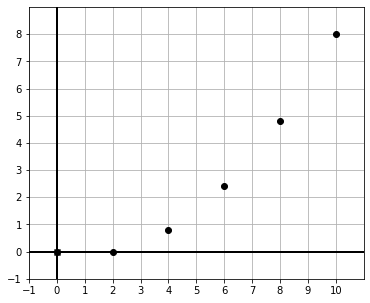

In [5]:
from draw2d import *
draw2d(Points2D(*positions))

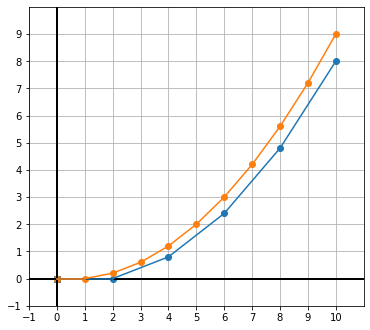

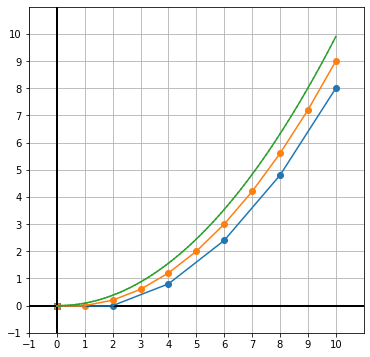

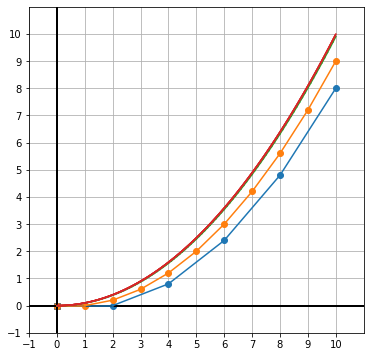

In [6]:
def pairs(lst):
    return list(zip(lst[:-1],lst[1:]))

def eulers_method(s0,v0,a,total_time,step_count):
    positions = [s0]
    s = s0
    v = v0
    dt = total_time/step_count
    for _ in range(0,step_count):
        s = add(s,scale(dt,v))
        v = add(v,scale(dt,a))
        positions.append(s)
    return positions

approx5 = eulers_method((0,0),(1,0),(0,0.2),10,5)
approx10 = eulers_method((0,0),(1,0),(0,0.2),10,10)
approx100 = eulers_method((0,0),(1,0),(0,0.2),10,100)
approx1000 = eulers_method((0,0),(1,0),(0,0.2),10,1000)

from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)]
    )

from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='C2') for (h,t) in pairs(approx100)]
    )

draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='C2') for (h,t) in pairs(approx100)],
    *[Segment2D(t,h,color='C3') for (h,t) in pairs(approx1000)],
    )

## 9.4 작은 타임스텝으로 오일러 방법 실행하기

### 9.4.1 연습문제

### 연습문제 9.2 (Mini-project)
일정하게 가속하는 객체에 대한 오일러 방법을 자동화하는 함수를 만들어라. 이 함수에서 가속도벡터, 초기 속도벡터, 초기 위치벡터를 주고, 필요하다면 다른 파라미터도 제공하라.

In [7]:
def eulers_method(s0,v0,a,total_time,step_count):
    trajectory = [s0]
    s = s0
    v = v0
    dt = total_time/step_count 
    for _ in range(0,step_count):
        s = add(s,scale(dt,v)) 
        v = add(v,scale(dt,a))
        trajectory.append(s)
    return trajectory

### 연습문제 9.3 (Mini-project)
9.4절 계산에서 각 시간 구간의 끝점에서 속도의 $y$성분을 갱신하다 보니 위체벡터의 $y$좌표를 실제보다 낮게 추정했다. 매 시간 구간의 시작점에서 속도를 갱신하도록 하면 시간에 따른 $y$위치를 실제보다 더 높게 추정함을 보여라.

In [8]:
def eulers_method_overapprox(s0,v0,a,total_time,step_count):
    trajectory = [s0]
    s = s0
    v = v0
    dt = total_time/step_count
    for _ in range(0,step_count):
        v = add(v,scale(dt,a))
        s = add(s,scale(dt,v))
        trajectory.append(s)
    return trajectory

In [9]:
eulers_method_overapprox((0,0),(1,0),(0,0.2),10,10)

[(0, 0),
 (1.0, 0.2),
 (2.0, 0.6000000000000001),
 (3.0, 1.2000000000000002),
 (4.0, 2.0),
 (5.0, 3.0),
 (6.0, 4.2),
 (7.0, 5.6),
 (8.0, 7.199999999999999),
 (9.0, 9.0),
 (10.0, 11.0)]

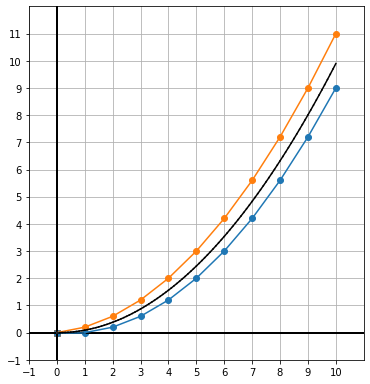

In [10]:
draw2d(
    Points2D(*eulers_method_overapprox((0,0),(1,0),(0,0.2),10,10), color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(eulers_method_overapprox((0,0),(1,0),(0,0.2),10,10))],
    Points2D(*approx10, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='k') for (h,t) in pairs(approx100)]
    )

### 연습문제 9.4 (Mini-project)
던져진 야구공이나 발사된 총알, 또는 공중을 나는 스노보더와 같이 임의의 발사체에는 모두 지구를 향하는 가속도벡터 9.81 m/s/s가 영향을 미친다. 평면의 $x$축을 평평한 대지라고 생각하고 $y$축의 양의 방향을 지구를 벗어나는 방향이라고 할 때, 이 가속도벡터는 (0, 9.81)로 표현된다. 어떤 사람이 위치 $x=0$에 서서 대략 어개 높이로 야구공을 던진다고 하면 야구공의 초기 위치를 (0, 1.5)라고 할 수 있다. 초기 속력이 30 m/s이고 $x$축의 양의 방향과 $20^\circ$로 야구공을 던졌을 때, 야구공의 궤적을 오일러 방법으로 시뮬레이션해라. 야구공이 대지에 떨어지기 전에 $x$축의 양의 방향으로 얼마나 멀리 나아갔는지 근사적으로 구하라.

In [11]:
from math import pi,sin,cos
angle = 20 * pi/180
s0 = (0,1.5)
v0 = (30*cos(angle),30*sin(angle))
a = (0,-9.81)
result = eulers_method(s0,v0,a,3,100)

### 연습문제 9.5 (Mini-project)
[연습문제 9.4]의 프로젝트에서 초기 속력 30m/s는 그대로 두자. 초기 위치를 (0,0)으로 바꾸고 초기 속도를 여러 각도로 바꾸어가며 오일러 방법을 재실행해보아라. 야구공을 $x$축의 양의방향에서 몇 도$(^\circ)$로 던져야 야구공이 가장 멀리 나아갈지를 구하라.

In [12]:
def baseball_trajectory(degrees):
    radians = degrees * pi/180
    s0 = (0,0)
    v0 = (30*cos(radians),30*sin(radians))
    a = (0,-9.81)
    return [(x,y) for (x,y) in eulers_method(s0,v0,a,10,1000) if y>=0]

### 연습문제 9.6 (Mini-project)
3차원 공간에서 움직이는 객체의 초기 속도가 (1,2,0)이고 가속도벡터는 (0,-1,1)로 일정하다고 하자. 이 객체가 원점에서 움직이기 시작할 때, 10초 후 위치를 구하라. 3장에서 사용한 그리기 함수를 써서 3차원 궤적을 플로팅하라.

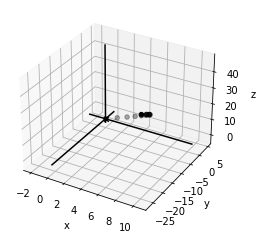

In [13]:
from draw3d import *
traj3d = eulers_method((0,0,0), (1,2,0), (0,-1,1), 10, 10)
draw3d(
    Points3D(*traj3d)
)

In [14]:
eulers_method((0,0,0), (1,2,0), (0,-1,1), 10, 1000)[-1]

(9.999999999999831, -29.949999999999644, 49.94999999999933)